# Data Science and Business Analytics(GRIP June 2021)

## Task 2 : Prediction using Unsupervised ML

## Author : Vitesh Khanna

## Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


### Importing required libraries¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing as pp
from sklearn.metrics import silhouette_score

### Loading Dataset

In [2]:
df = pd.read_csv('datasets/Iris.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking Null values

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Dropping unwanted features

In [7]:
df.drop('Id',axis = 1,inplace = True)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization

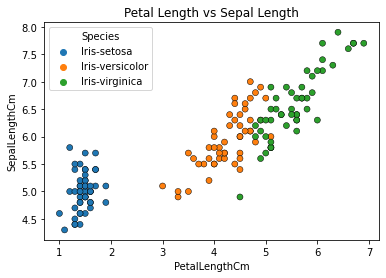

In [9]:
#PetalLength vs SepalLength
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()


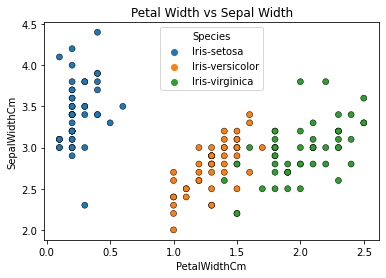

In [10]:
#PetalWidth vs SepalWidth
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Width vs Sepal Width')
plt.show()

### Finding optimum number of clusters using Elbow method

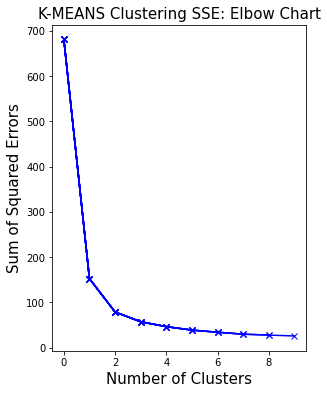

In [24]:
x = df.iloc[:, [0,1,2,3]].values
figure = plt.figure(figsize=(10, 6))
elbow = figure.add_subplot(1,2,1) #elbow chart


n_clusters=11
cost=[]

for i in range(1,n_clusters):
    kmean= KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(x)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')




### Finding optimum number of clusters using Silhouette score

Text(0, 0.5, 'Silhouette Score')

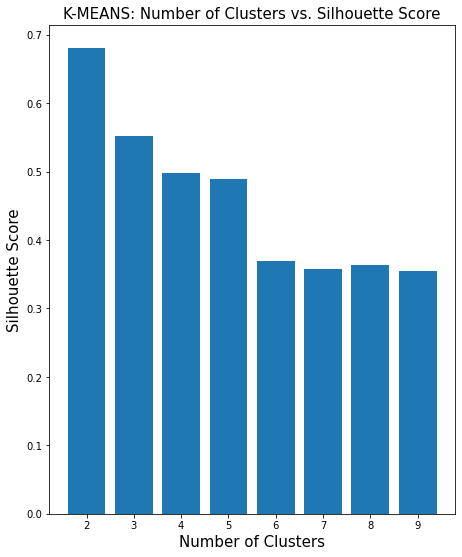

In [12]:
figure = plt.figure(figsize=(16, 9))
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(x, KMeans(n_clusters = n_cluster).fit_predict(x))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15)

### Building KMeans model

In [31]:
# Build the KMeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)
labels = kmeans.fit_predict(x)

In [32]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualization of clusters

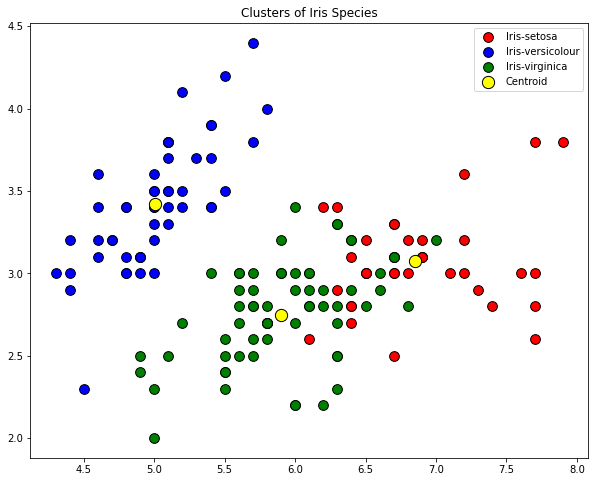

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(x[labels == 0,0], x[labels == 0,1], s = 95, edgecolor='k', c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1,0], x[labels == 1,1], s = 95, edgecolor='k', c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2,0], x[labels == 2,1], s = 95, edgecolor='k', c = 'green', label = 'Iris-virginica')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s = 150, edgecolor='k', c ='yellow', label = 'Centroid')


plt.title('Clusters of Iris Species')
plt.legend()
plt.show()